# PCA
---
### 1. PCA

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

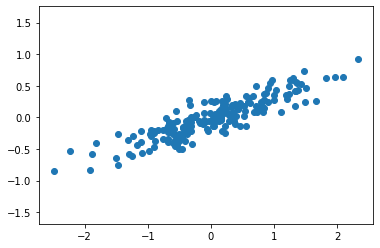

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng=np.random.RandomState(1)
x=np.dot(rng.rand(2,2),rng.randn(2,200)).T

plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

In [2]:
from sklearn.decomposition import PCA

mypca=PCA(n_components=2)
mypca.fit(x)

print(mypca.components_)
print(mypca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

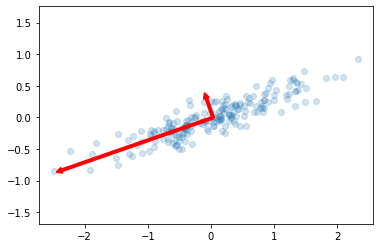

In [3]:
def draw_vector(v0,v1,ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(color='red',
                   arrowstyle='simple',
                   linewidth=2,
                   shrinkA=0,
                   shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    
plt.scatter(x[:,0],x[:,1],alpha=.2)
for length,vector in zip(mypca.explained_variance_,mypca.components_):
    v=vector*3*np.sqrt(length)
    draw_vector(mypca.mean_,mypca.mean_+v)
plt.axis('equal')

---
2. 차원축소

In [4]:
dimpca=PCA(n_components=1)
dimpca.fit(x)
x_pca=dimpca.transform(x)
print('original',x.shape)
print('transform',x_pca.shape)

original (200, 2)
transform (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

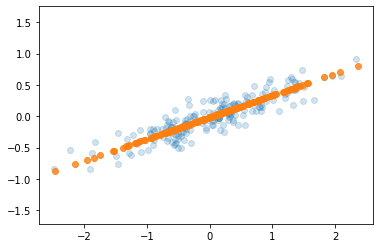

In [5]:
xn=dimpca.inverse_transform(x_pca)
plt.scatter(x[:,0],x[:,1],alpha=.2)
plt.scatter(xn[:,0],xn[:,1],alpha=.8)
plt.axis('equal')

---
3. 특징추출

In [1]:
from sklearn.datasets import fetch_lfw_people

In [4]:
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [5]:
from sklearn.decomposition import PCA
face_pca=PCA(150)
face_pca.fit(faces.data)

PCA(n_components=150)

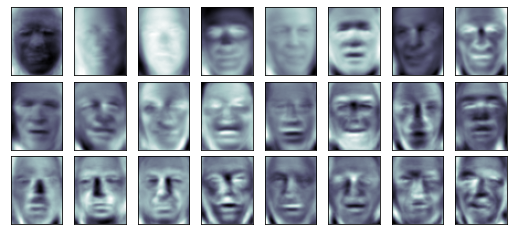

In [9]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(3,8,figsize=(9,4),
                     subplot_kw={'xticks':[],'yticks':[]},
                     gridspec_kw=dict(hspace=.1,wspace=.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(face_pca.components_[i].reshape(62,47),cmap='bone')